<a href="https://colab.research.google.com/github/KPxto/imersao-dados-alura/blob/main/Aula1%262_Alura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

### Vamos carregar nossos dados

In [4]:
fonte = 'https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/MICRODADOS_ENEM_2019_SAMPLE_43278.csv?raw=true'

In [5]:
dados = pd.read_csv(fonte)

### Como será a distribuição por estado de candidatos com até 14 anos de idade?

* Vemos que os 4 primeiros sao de estados do norte-nordeste

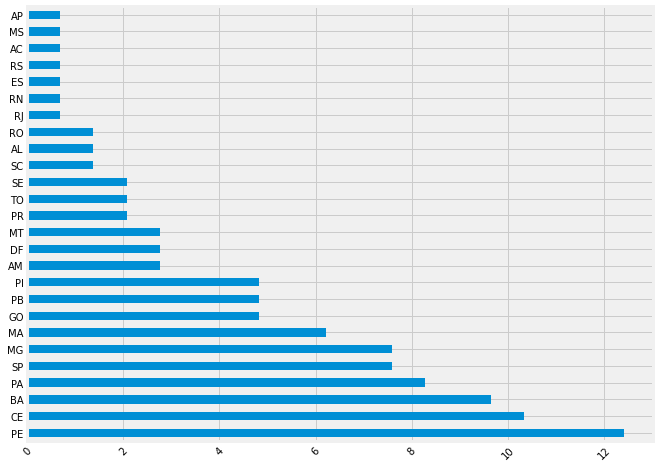

In [7]:
round(dados.query("NU_IDADE <= 14")['SG_UF_RESIDENCIA'].value_counts(normalize=True) * 100, 2).plot(kind='barh', figsize=(10,8))
plt.xticks(rotation=45);

In [9]:
renda_ordenada = dados['Q006'].unique()

In [10]:
renda_ordenada

array(['B', 'C', 'E', 'G', 'D', 'F', 'N', 'A', 'I', 'H', 'L', 'Q', 'M',
       'K', 'J', 'O', 'P'], dtype=object)

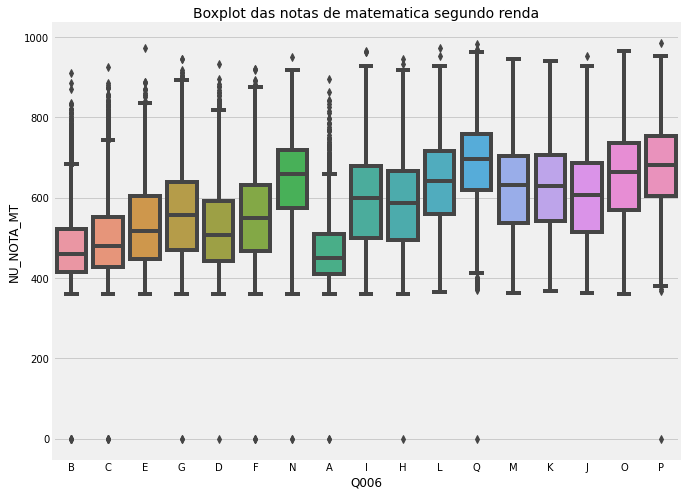

In [11]:
# trabalhando com seaborn
# vamos fazer um boxplot comparando as notas nas provas de matematica por renda do candidato
plt.figure(figsize=(10,8))
sns.boxplot(x='Q006', y="NU_NOTA_MT", data=dados, order=renda_ordenada)
plt.title('Boxplot das notas de matematica segundo renda', fontsize=14);

In [39]:
# somatorio de todas as notas por candidato
# vamos criar uma nova coluna para isso
dados["NU_NOTA_TOTAL"] = dados[materias].sum(axis=1)

Text(0.5, 1.0, 'Boxplot das notas gerais segundo renda')

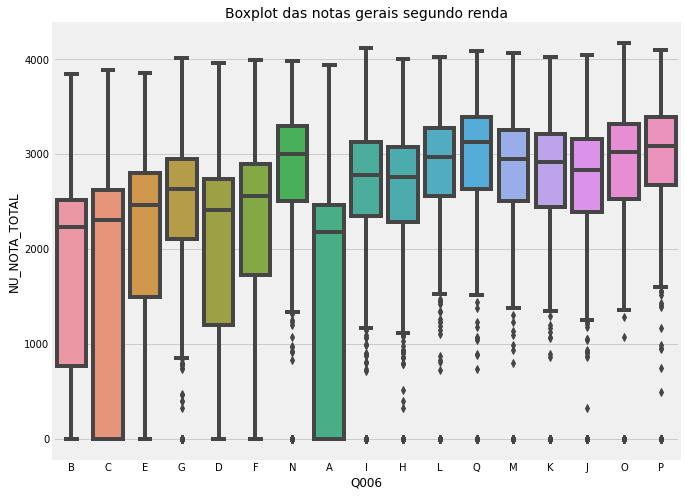

In [41]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Q006', y="NU_NOTA_TOTAL", data=dados, order=renda_ordenada)
plt.title('Boxplot das notas gerais segundo renda', fontsize=14)

In [43]:
# desafio: criar uma funcao para plotagem dos boxplots
dados_sem_nota_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_nota_zero[materias]

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
0,435.6,512.3,432.4,488.6,420.0
1,NaN,409.3,NaN,375.3,400.0
2,423.2,499.1,427.2,441.0,560.0
3,426.2,578.1,499.9,551.5,500.0
4,516.5,571.3,424.5,511.2,780.0
...,...,...,...,...,...
127375,502.4,559.6,539.7,525.7,740.0
127376,449.1,380.9,418.2,450.3,520.0
127377,NaN,516.0,NaN,497.9,440.0
127378,564.7,416.2,455.7,517.3,620.0


<AxesSubplot:xlabel='Q006', ylabel='NU_NOTA_TOTAL'>

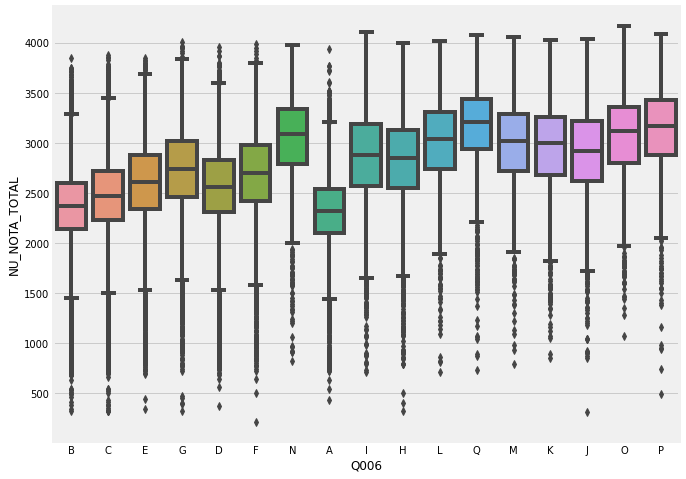

In [44]:
# vamos plotar a DF acima em boxplot e comparar por renda
plt.figure(figsize=(10,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_nota_zero, order=renda_ordenada)

<AxesSubplot:xlabel='Q006', ylabel='NU_NOTA_TOTAL'>

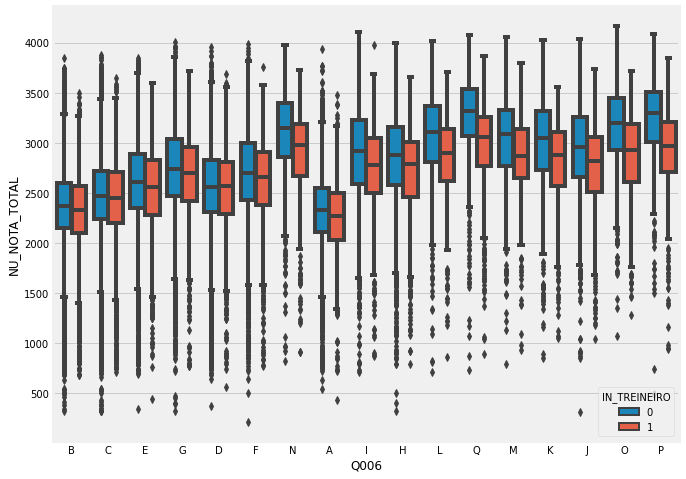

In [46]:
# vamos aqui adicionar um terceiro ponto de analise e cruzamento de dados com o parametro hue
plt.figure(figsize=(10,8))
sns.boxplot(x='Q006', y='NU_NOTA_TOTAL', data=dados_sem_nota_zero, 
            order=renda_ordenada, hue='IN_TREINEIRO')

Mega Desafio Thaina: Pegar a amostra completa dos alunos de 13 a 14 anos.

Desafio do Gui: aumentar a amostra para alunos menor de idade e compara a proporcao por estado.

Desafio 3: criar uma funcao para plotagem dos boxplots

Desafio 4: Verificar se quem zerou a prova foi eliminado ou nao estava presente

Desafio 5: Quem eh eliminado tira zero ou sera NaN (nao teve registro de notas)

Desafio 6: Verificar a proporcao dos participantes de rendas mais altas e mais baixas como treineiro e nao treineiro

Desafio 7: Fazer o mesmo boxplot das rendas olhando para a questao 25 (tem internet ou nao em sua casa) e fazer uma reflexao sobre o assunto no contexto da pandemia.

In [47]:
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


### Desafio 3: Criar uma função para plotar boxplot

In [48]:
def plotagem(x, y, df, ordem=None, hue=None):
    plt.figure(figsize=(10,8))
    sns.boxplot(x=x, y=y, data=df, 
            order=ordem, hue=hue)
    

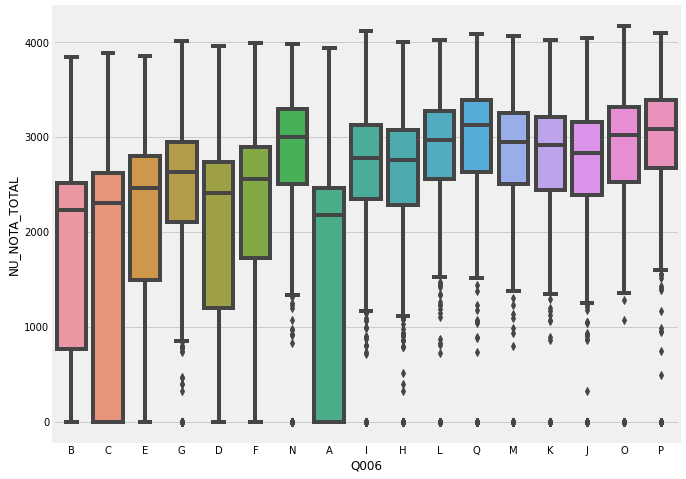

In [49]:
plotagem('Q006', 'NU_NOTA_TOTAL', dados, ordem=renda_ordenada)

### Desafio 4: Verificar se quem zerou a prova foi eliminado ou nao estava presente

In [51]:
presenca_provas = ["TP_PRESENCA_CN", "TP_PRESENCA_CH", "TP_PRESENCA_MT", "TP_PRESENCA_LC"]
notas_zero = dados.query("NU_NOTA_TOTAL == 0")[presenca_provas]
notas_zero['TP_PRESENCA_CH']

10        0
11        0
26        0
38        0
40        0
         ..
127351    0
127365    0
127366    0
127368    0
127374    0
Name: TP_PRESENCA_CH, Length: 29162, dtype: int64

In [52]:
materias

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

### Desafio 5: Quem eh eliminado tira zero ou sera NaN (nao teve registro de notas)

In [53]:
# quem eh eliminado ganha NaN, ou seja, nulo
# aqui esta um candidato e suas respectivas notas

dados.iloc[3839][materias]

NU_NOTA_CN         428.4
NU_NOTA_CH           NaN
NU_NOTA_MT         450.8
NU_NOTA_LC           NaN
NU_NOTA_REDACAO      NaN
Name: 3839, dtype: object

In [54]:
# o codigo 2 revela que o mesmo foi eliminado da prova na qual tirou NaN

dados.iloc[3839]['TP_PRESENCA_LC']

2

### Desafio 6: Verificar a proporcao dos participantes de rendas mais altas e mais baixas como treineiro e nao treineiro


### Desafio 7: Fazer o mesmo boxplot das rendas olhando para a questao 25 (tem internet ou nao em sua casa) e fazer uma reflexao sobre o assunto no contexto da pandemia

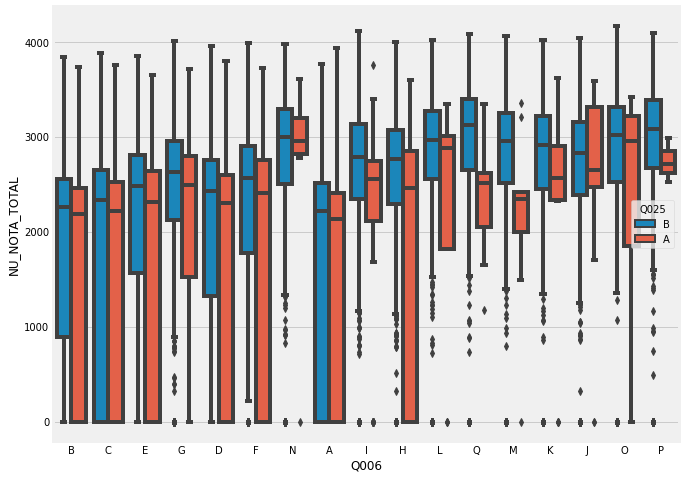

In [56]:
plotagem('Q006', "NU_NOTA_TOTAL", dados, hue='Q025', ordem=renda_ordenada)